# Heart Failure Risk Prediction: An Exploratory Data Analysis (EDA)

### Project Goal
This project is an Exploratory Data Analysis (EDA) of a clinical heart failure dataset. The primary objective is to **identify the key risk factors** and **hidden patterns** associated with heart failure.

The focus is on **deriving actionable insights** from the data, not on building a machine learning model.

### Analysis Plan:
1.  **Data Cleaning:** Investigate and handle missing or impossible values (like '0' Cholesterol) to ensure data integrity.
2.  **Data Visualization:** Use plots (count plots, histograms, heatmaps) to understand the relationships between features (e.g., `Age`, `ChestPainType`, `ST_Slope`) and the `HeartDisease` outcome.
3.  **Insight & Recommendation:** Summarize the findings to provide data-driven recommendations for potential patient screening strategies and data quality improvements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\rosha\\OneDrive\\Desktop\\3RI\\Analytics\\Project\heart.csv")

In [3]:
print("Data Shape:", df.shape)

Data Shape: (918, 12)


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
print("--Missing values before replace with NaN--")
df.isnull().sum()

--Missing values before replace with NaN--


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Analysis

In [10]:
#RestingBP and Cholesterol must not be contain 0 in there min
df[['Cholesterol','RestingBP']].describe()  

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,198.799564,132.396514
std,109.384145,18.514154
min,0.000000,0.000000
25%,173.250000,120.000000
50%,223.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [11]:
#count the number of 0 values in each column
Cholesterol_zeros =  (df["Cholesterol"] == 0).sum()
print(f"Number of impossible '0' values in Cholesterol_zeros: {Cholesterol_zeros}")

Resting_BP_zeros = (df["RestingBP"] == 0).sum()
print(f"Number of impossible '0' values in RestingBP: {Resting_BP_zeros}")

Number of impossible '0' values in Cholesterol_zeros: 172
Number of impossible '0' values in RestingBP: 1


In [12]:
# replace 0 with NaN 
df['Cholesterol'] = df['Cholesterol'].replace(0,np.nan)
df['RestingBP'] = df['RestingBP'].replace(0,np.nan)

#now check how many missing values after replace
print("\n-- Missing values after replacment--")
print(df.isnull().sum())


-- Missing values after replacment--
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [13]:
#Here missing values are appere
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


### Handle the missing values

In [15]:
### Handle the missing values# calculates the median within each 'Sex' group
# then uses 'transform' to fill the NaNs only within that same group.

df['Cholesterol'] = df.groupby('Sex')['Cholesterol'].transform(lambda x: x.fillna(x.median()))

df['RestingBP'] = df.groupby('Sex')['RestingBP'].transform(lambda x: x.fillna(x.median()))

# Verify
print("\n--- Missing Values After GROUPED Imputation ---")
print(df.isnull().sum())


--- Missing Values After GROUPED Imputation ---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Exploratory Data Analysis & Hypothesis Testing

#### Analyze the Target Variable
First, let's see how many patients in the dataset have heart disease. This tells us if our dataset is balanced

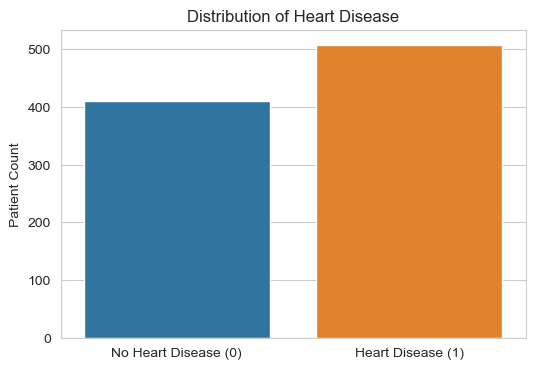

'This graph (which shows a 55/45 split in your data) indicates you have a relatively balanced dataset, which is great.'

In [17]:
#Check Target Variable Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='HeartDisease')

# Add labels
ax.set_xticklabels(['No Heart Disease (0)', 'Heart Disease (1)'])
ax.set_title('Distribution of Heart Disease')
plt.ylabel('Patient Count')
plt.xlabel('')
plt.show()

#### 📊 Bivariate Analysis: Visualizing Key Risk Factors
find the "story" by comparing key features against the HeartDisease target.

C:\Users\rosha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


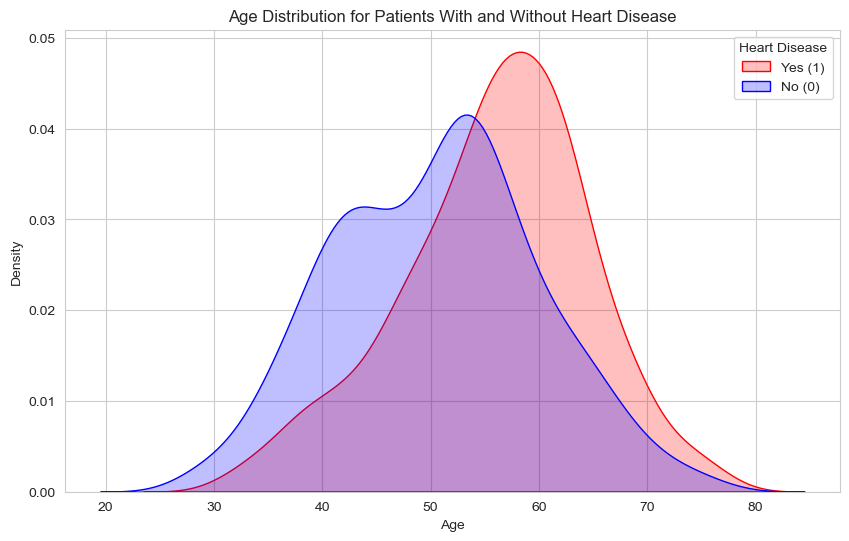

In [18]:
# Age vs. Heart Disease

# ---Age Distribution by Heart Disease ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='HeartDisease', fill=True, 
            palette={0: 'blue', 1: 'red'}, common_norm=False)

plt.title('Age Distribution for Patients With and Without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Heart Disease', labels=['Yes (1)', 'No (0)'])
plt.show()

The red peak (Heart Disease) is clearly shifted to the right. This visually suggests 
that older patients are more likely to have heart disease than younger patients.

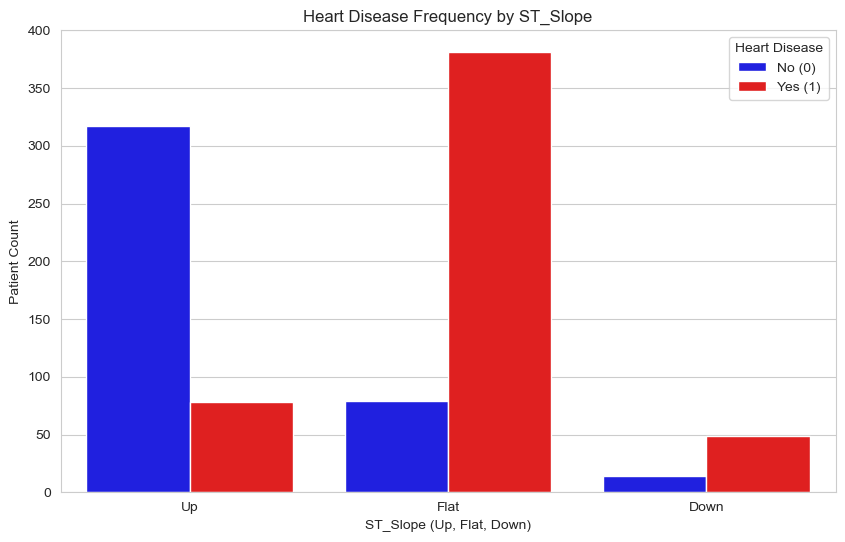

In [19]:
# ST_Slope vs. Heart Disease

# --- Cell 18: ST_Slope vs. Heart Disease ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', 
              palette={0: 'blue', 1: 'red'})

plt.title('Heart Disease Frequency by ST_Slope')
plt.xlabel('ST_Slope (Up, Flat, Down)')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

This is a very strong finding. Patients with an 'Up' (upsloping) ST_Slope are overwhelmingly healthy. 
Conversely, patients with a 'Flat' ST_Slope have a very high rate of heart disease. 
This is a critical clinical marker.

#### Multivariate Analysis: Correlation Heatmap
Let's see how all the numerical features relate to each other and, most importantly, to HeartDisease

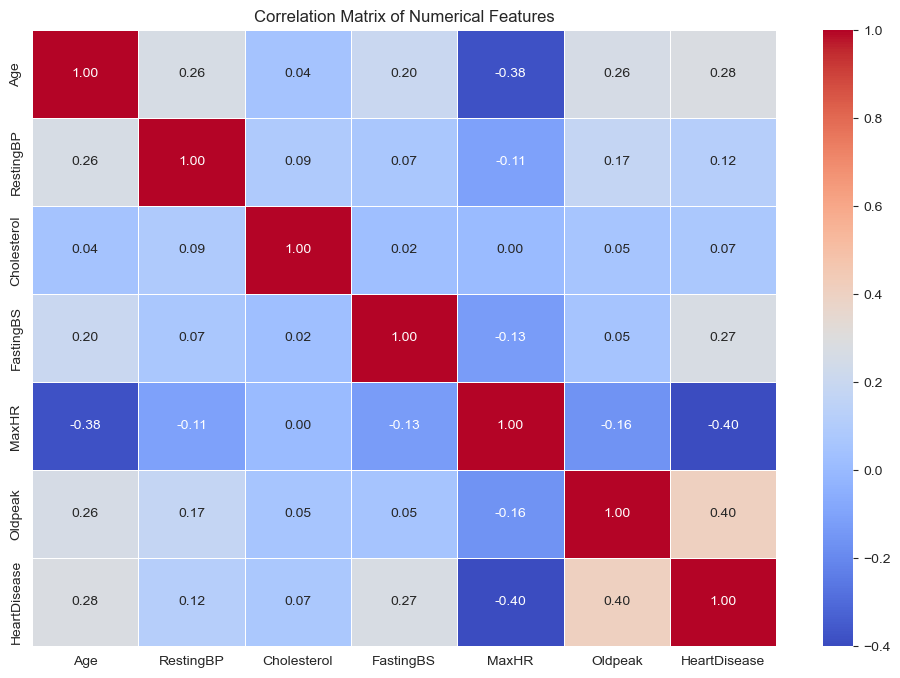

In [20]:
# ---Correlation Heatmap ---
plt.figure(figsize=(12, 8))

# Calculate correlation, making sure to only use numeric columns
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Look at the bottom row (HeartDisease):

Oldpeak has a strong positive correlation (0.40).

MaxHR (Max Heart Rate) has a strong negative correlation (-0.40). 
This means the lower a patient's max heart rate, the higher their risk.

Age also has a positive correlation (0.28).

### Hypothesis Testing
Null Hypothesis ($H_0$): There is no significant difference in the mean age between patients with and without heart disease.

Alternative Hypothesis 
($H_a$): There is a significant difference in the mean age.

##### Our KDE plot suggested that the average age is different for patients with and without heart disease. Let's prove this statistically.

In [21]:
# Independent T-test

# --- Import stats library ---
from scipy import stats

# --- Perform T-test for Age ---

# 1. Create two separate groups
group_no_disease = df[df['HeartDisease'] == 0]['Age']
group_with_disease = df[df['HeartDisease'] == 1]['Age']

# 2. Perform the t-test
# We set equal_var=False as the variances might not be equal
t_statistic, p_value = stats.ttest_ind(group_no_disease, group_with_disease, equal_var=False)

print("--- T-Test Results for Age vs. Heart Disease ---")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value}")

# 3. Interpret the result
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print(f"\nConclusion: (P-value is {p_value:.2e} < {alpha})")
    print("We REJECT the null hypothesis.")
    print("There IS a statistically significant difference in mean age between the two groups.")
else:
    print(f"\nConclusion: (P-value is {p_value:.2e} > {alpha})")
    print("We FAIL TO REJECT the null hypothesis.")
    print("There is NO statistically significant difference in mean age.")

--- T-Test Results for Age vs. Heart Disease ---
T-Statistic: -8.8225
P-Value: 6.3483366558258026e-18

Conclusion: (P-value is 6.35e-18 < 0.05)
We REJECT the null hypothesis.
There IS a statistically significant difference in mean age between the two groups.


##### Analysis of Key Categorical Features
Let's see how non-numerical features relate to heart disease.

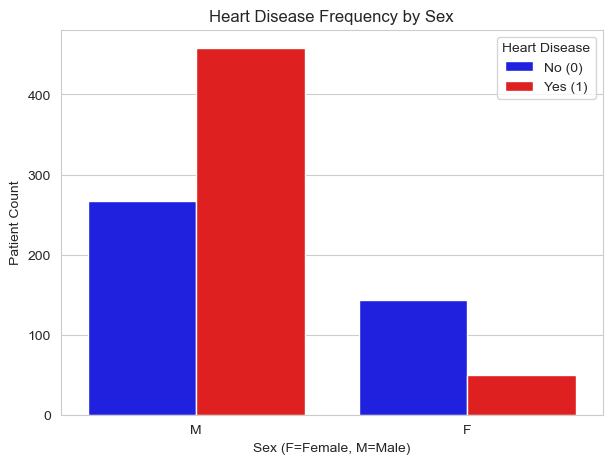

In [22]:
# --- Sex vs. Heart Disease ---
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette={0: 'blue', 1: 'red'})
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (F=Female, M=Male)')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

This plot will likely show that males (M) in this dataset have a significantly higher incidence of heart disease than females (F).

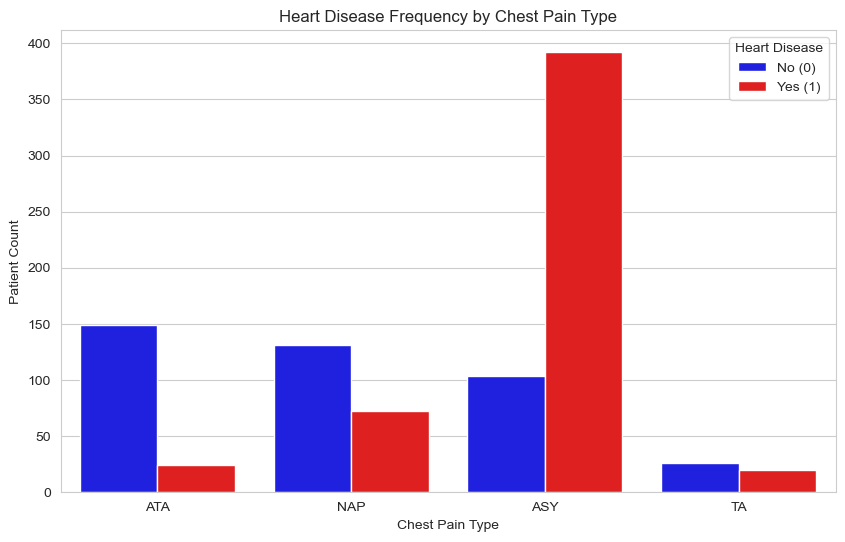

In [23]:
# --- Chest Pain Type vs. Heart Disease ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette={0: 'blue', 1: 'red'})
plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No (0)', 'Yes (1)'])
plt.show()

This is a critical finding. You will see that patients with 'ASY' (Asymptomatic) pain have the highest rate of heart disease. This is the "silent" risk group. Patients with 'NAP' or 'ATA' pain are much less likely to have heart disease.

### Outlier Detection
check for extreme values in our main numerical features.

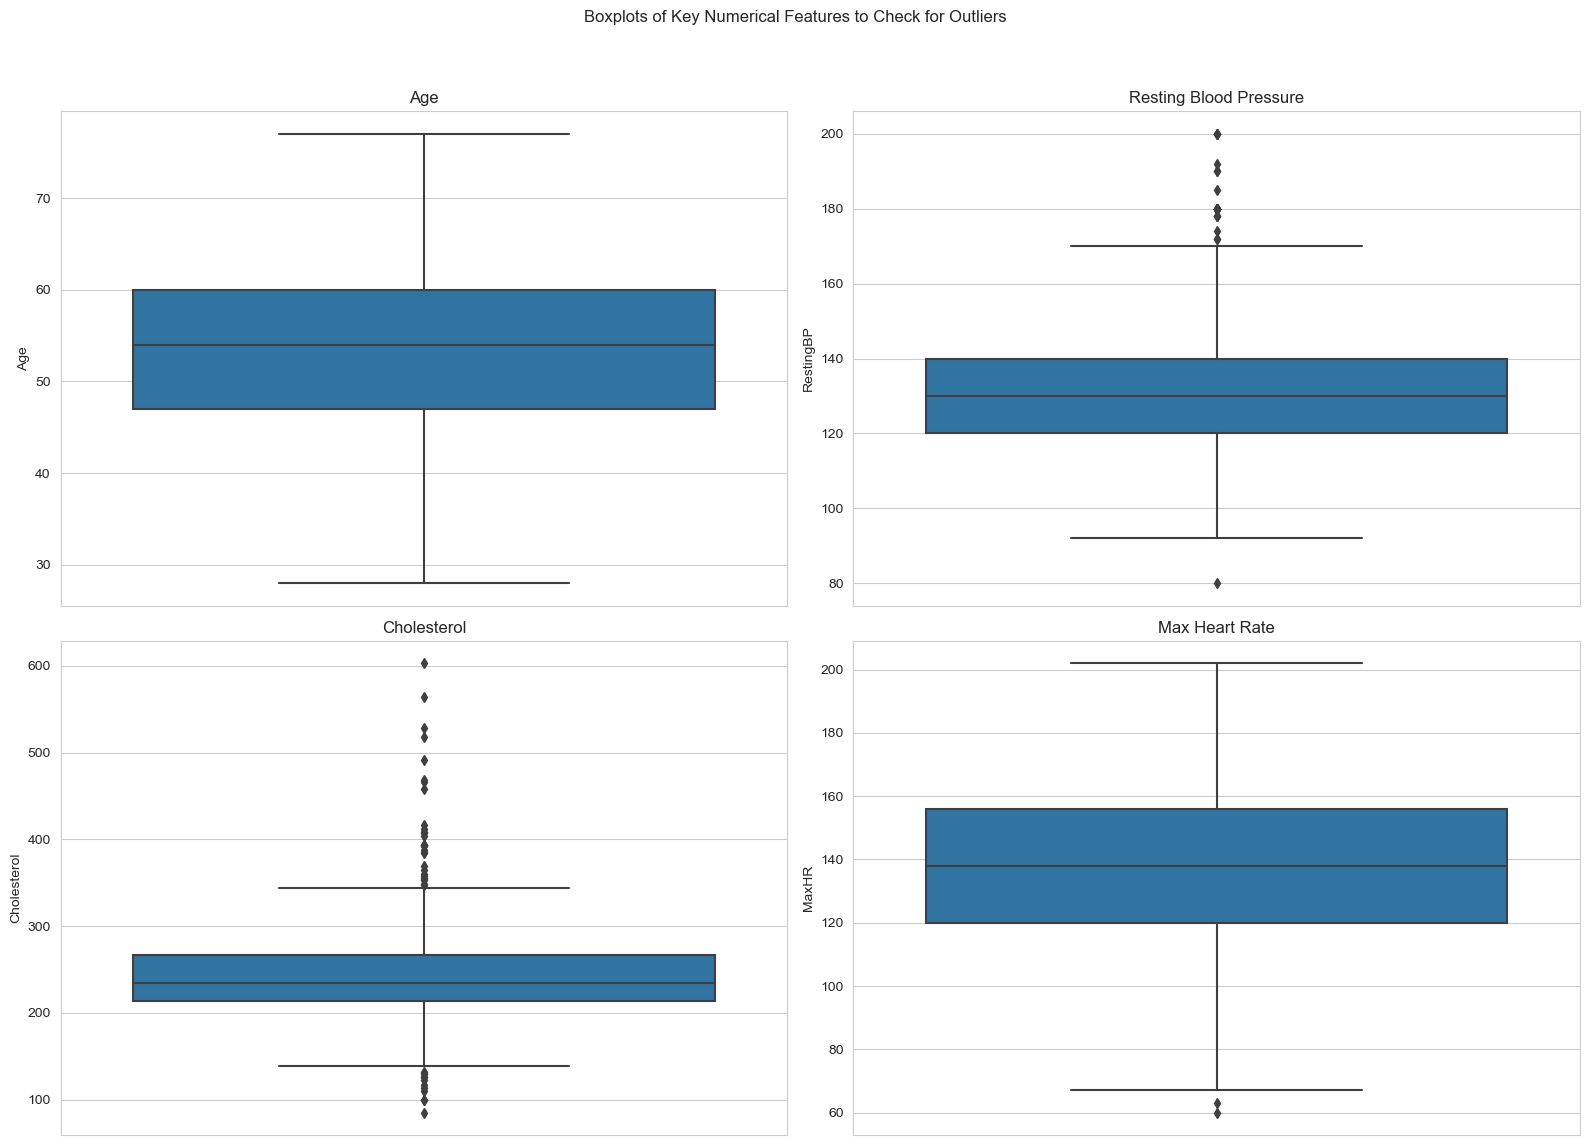

In [25]:
# --- Boxplots for Outlier Detection ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Boxplots of Key Numerical Features to Check for Outliers')

sns.boxplot(ax=axes[0, 0], data=df, y='Age')
axes[0, 0].set_title('Age')

sns.boxplot(ax=axes[0, 1], data=df, y='RestingBP')
axes[0, 1].set_title('Resting Blood Pressure')

sns.boxplot(ax=axes[1, 0], data=df, y='Cholesterol')
axes[1, 0].set_title('Cholesterol')

sns.boxplot(ax=axes[1, 1], data=df, y='MaxHR')
axes[1, 1].set_title('Max Heart Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This shows you are a thorough analyst. You will see that RestingBP and Cholesterol have some high-end outliers (like the 603 value).

### Final Insights & Recommendations

My analysis of the heart failure dataset has uncovered several key risk factors and data quality issues. The following insights are critical for any early detection or prevention strategy:

**Key Patient Risk Factors:**

* **Age is a Significant Factor:** The average age of patients *with* heart disease is statistically higher than those without. The risk increases as patients get older.
* **"Silent" Risk (Chest Pain):** The most dangerous group of patients are those with **'ASY' (Asymptomatic) chest pain**. They have the highest rate of heart disease but report no symptoms.
* **ST_Slope is a Critical Marker:** Patients with a **'Flat' ST_Slope** have an extremely high risk of heart disease, while those with an **'Up' ST_Slope** are overwhelmingly healthy. This is a primary clinical indicator.
* **Sex:** Males in this dataset showed a significantly higher prevalence of heart disease.
* **Heart Rate & Exercise:** A **lower Max Heart Rate (`MaxHR`)** and the presence of **Exercise-Induced Angina (`ExerciseAngina` = Y)** are both strongly correlated with heart disease.

**Data Quality & Recommendations:**

* **Data Integrity Issue:** The dataset contained **172 patient records (18.7%) with '0' Cholesterol** and 1 record with '0' RestingBP. These are impossible clinical values.
* **Recommendation:** My first recommendation is to **fix the data collection process**. These '0' values should be flagged as `NULL` or `NaN` at the source. My project corrected this by imputing the median value based on sex, but this is a critical data quality gap that must be addressed.